# Exploratory Data Analysis

In [23]:
# imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# for stop words 
from collections import Counter 

# for text tokenization
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# pickling
import pickle

# word clouds
from wordcloud import WordCloud

## Most Common Words

In [2]:
# reading in document term matrix 

data = pd.read_pickle('dtm.pkl')
data.head()

,aah,aahh,aahhha,aaj,aasra,abandon,abandonarme,abandoned,abangin,abar,...,çok,çözebilirsin,étaient,öfkeni,ölüyorum,ömürden,ötelerden,şafak,şimdi,السلام
bob_dylan,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
david_bowie,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
janis_joplin,3,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
john_prine,1,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
leonard_cohen,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2


In [3]:
data = data.transpose()
data.head()

,bob_dylan,david_bowie,janis_joplin,john_prine,leonard_cohen,linda_ronstadt,mark_knopfler,neil_young,stevie_nicks,the_band,willie_nelson
aah,0,0,3,1,0,0,0,0,1,0,0
aahh,0,0,1,0,0,0,0,0,0,0,0
aahhha,0,0,2,0,0,0,0,0,0,0,0
aaj,0,0,0,0,0,0,0,0,0,1,0
aasra,0,0,0,0,0,0,0,0,0,1,0


#### _Finding the top 30 words used by each musician_

In [9]:
top_dict = {}

for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c] = list(zip(top.index, top.values))

In [6]:
top.head()

just    145
im      138
dont    136
love     84
like     83
Name: willie_nelson, dtype: int64

In [93]:
top

['just',
 'im',
 'dont',
 'love',
 'like',
 'aint',
 'got',
 'know',
 'time',
 'ive',
 'good',
 'world',
 'life',
 'day',
 'let',
 'night',
 'come',
 'ill',
 'little',
 'mind',
 'blue',
 'house',
 'gone',
 'lord',
 'theres',
 'say',
 'long',
 'eyes',
 'cruel',
 'home']

In [7]:
top_dict

{'bob_dylan': [('im', 171),
  ('like', 162),
  ('just', 149),
  ('dont', 136),
  ('know', 127),
  ('got', 119),
  ('said', 117),
  ('youre', 107),
  ('ill', 100),
  ('oh', 99),
  ('play', 90),
  ('man', 86),
  ('love', 84),
  ('come', 83),
  ('aint', 83),
  ('time', 82),
  ('way', 75),
  ('say', 73),
  ('ive', 69),
  ('long', 69),
  ('day', 67),
  ('make', 62),
  ('mind', 60),
  ('right', 59),
  ('tell', 57),
  ('night', 54),
  ('good', 48),
  ('want', 48),
  ('head', 48),
  ('theres', 47)],
 'david_bowie': [('oh', 243),
  ('im', 183),
  ('love', 167),
  ('dont', 112),
  ('la', 104),
  ('just', 98),
  ('like', 96),
  ('ya', 87),
  ('li', 82),
  ('know', 79),
  ('youre', 78),
  ('got', 77),
  ('come', 72),
  ('time', 64),
  ('world', 61),
  ('day', 57),
  ('years', 55),
  ('whop', 51),
  ('want', 50),
  ('girl', 48),
  ('eyes', 47),
  ('yeah', 47),
  ('man', 47),
  ('afraid', 46),
  ('say', 45),
  ('ive', 44),
  ('things', 44),
  ('fame', 43),
  ('tvc', 42),
  ('long', 42)],
 'janis_jop

In [8]:
# printing the top 15 words for each musician

for musician, top_words in top_dict.items():
    print(musician)
    print(', '. join([word for word, count in top_words[0:14]]))
    print('---')

bob_dylan
im, like, just, dont, know, got, said, youre, ill, oh, play, man, love, come
---
david_bowie
oh, im, love, dont, la, just, like, ya, li, know, youre, got, come, time
---
janis_joplin
yeah, baby, oh, know, dont, try, honey, love, lord, im, hey, want, got, mama
---
john_prine
just, dont, like, im, love, got, old, time, know, way, aint, say, long, man
---
leonard_cohen
love, im, like, la, lover, come, dont, know, theres, need, oh, just, said, night
---
linda_ronstadt
love, im, know, oh, youre, like, dont, ill, just, baby, heart, ive, time, come
---
mark_knopfler
im, got, like, dont, love, just, youre, know, ill, away, way, time, man, thats
---
neil_young
im, love, got, like, know, dont, away, man, old, night, youre, just, ill, long
---
stevie_nicks
love, like, just, know, dont, oh, baby, whoo, come, say, time, heart, night, im
---
the_band
im, dont, know, just, like, got, time, oh, ill, gonna, feel, wanna, want, youre
---
willie_nelson
just, im, dont, love, like, aint, got, know

#### _Adding most common words to stop word list_ 

In [11]:
# pulling out top 30 words for each musician 

words= []
for musician in data.columns:
    top = [word for (word, count) in top_dict[musician]]
    for t in top: 
        words.append(t)
        
words

['im',
 'like',
 'just',
 'dont',
 'know',
 'got',
 'said',
 'youre',
 'ill',
 'oh',
 'play',
 'man',
 'love',
 'come',
 'aint',
 'time',
 'way',
 'say',
 'ive',
 'long',
 'day',
 'make',
 'mind',
 'right',
 'tell',
 'night',
 'good',
 'want',
 'head',
 'theres',
 'oh',
 'im',
 'love',
 'dont',
 'la',
 'just',
 'like',
 'ya',
 'li',
 'know',
 'youre',
 'got',
 'come',
 'time',
 'world',
 'day',
 'years',
 'whop',
 'want',
 'girl',
 'eyes',
 'yeah',
 'man',
 'afraid',
 'say',
 'ive',
 'things',
 'fame',
 'tvc',
 'long',
 'yeah',
 'baby',
 'oh',
 'know',
 'dont',
 'try',
 'honey',
 'love',
 'lord',
 'im',
 'hey',
 'want',
 'got',
 'mama',
 'come',
 'babe',
 'tell',
 'just',
 'man',
 'good',
 'time',
 'whoa',
 'need',
 'youre',
 'like',
 'little',
 'going',
 'said',
 'say',
 'ill',
 'just',
 'dont',
 'like',
 'im',
 'love',
 'got',
 'old',
 'time',
 'know',
 'way',
 'aint',
 'say',
 'long',
 'man',
 'gonna',
 'home',
 'come',
 'thats',
 'want',
 'night',
 'said',
 'away',
 'cause',
 'baby

In [12]:
# aggregating list to idenitfy the most common words along with how musicians have that word in their top 30
Counter(words).most_common()

[('im', 11),
 ('like', 11),
 ('just', 11),
 ('dont', 11),
 ('know', 11),
 ('love', 11),
 ('come', 11),
 ('time', 11),
 ('got', 10),
 ('youre', 9),
 ('oh', 8),
 ('man', 8),
 ('say', 8),
 ('ill', 7),
 ('way', 7),
 ('want', 7),
 ('said', 6),
 ('ive', 6),
 ('long', 6),
 ('night', 6),
 ('good', 6),
 ('day', 5),
 ('tell', 5),
 ('theres', 5),
 ('baby', 5),
 ('away', 5),
 ('life', 5),
 ('make', 4),
 ('mind', 4),
 ('right', 4),
 ('world', 4),
 ('eyes', 4),
 ('need', 4),
 ('little', 4),
 ('heart', 4),
 ('let', 4),
 ('aint', 3),
 ('la', 3),
 ('yeah', 3),
 ('old', 3),
 ('gonna', 3),
 ('thats', 3),
 ('cause', 3),
 ('think', 3),
 ('gone', 3),
 ('lord', 2),
 ('hey', 2),
 ('home', 2),
 ('look', 2),
 ('shes', 2),
 ('play', 1),
 ('head', 1),
 ('ya', 1),
 ('li', 1),
 ('years', 1),
 ('whop', 1),
 ('girl', 1),
 ('afraid', 1),
 ('things', 1),
 ('fame', 1),
 ('tvc', 1),
 ('try', 1),
 ('honey', 1),
 ('mama', 1),
 ('babe', 1),
 ('whoa', 1),
 ('going', 1),
 ('went', 1),
 ('lover', 1),
 ('hallelujah', 1),
 ('kno

In [44]:
# I will exclude a word if two or more musicians have it as a top word
# will also include "li" and "tvc" which aren't real words and likely snuck in during the text cleaning + tokenizing process

add_stop_words = [word for word, count in Counter(words).most_common() if count >= 2] + ['li', 'tvc']
add_stop_words

['im',
 'like',
 'just',
 'dont',
 'know',
 'love',
 'come',
 'time',
 'got',
 'youre',
 'oh',
 'man',
 'say',
 'ill',
 'way',
 'want',
 'said',
 'ive',
 'long',
 'night',
 'good',
 'day',
 'tell',
 'theres',
 'baby',
 'away',
 'life',
 'make',
 'mind',
 'right',
 'world',
 'eyes',
 'need',
 'little',
 'heart',
 'let',
 'aint',
 'la',
 'yeah',
 'old',
 'gonna',
 'thats',
 'cause',
 'think',
 'gone',
 'lord',
 'hey',
 'home',
 'look',
 'shes',
 'li',
 'tvc']

In [45]:
# read in cleaned dataframe 

data_clean = pd.read_pickle('data_clean.pkl')
data_clean.head()

,lyrics
bob_dylan,twas a dark day in dallas november a day tha...
david_bowie,mmm num ba de dum bum ba be doo buh dum ba b...
janis_joplin,busted flat in baton rouge waiting for a train...
john_prine,she dont like her eggs all runny she thinks c...
leonard_cohen,now ive heard there was a secret chord that d...


In [46]:
# add new stop words 

stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# recreated document-term matrix

cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean['lyrics'])
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

In [47]:
# pickling CounVectorizer object and dataframe with stopwords removed 

pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

### _Making word clouds!_

In [48]:
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2", max_font_size=150, random_state=42)

In [49]:
# using matplotlib to resret output dimensions 
plt.rcParams['figure.figsize'] = [16,6]

In [50]:
data.columns 

Index(['bob_dylan', 'david_bowie', 'janis_joplin', 'john_prine',
       'leonard_cohen', 'linda_ronstadt', 'mark_knopfler', 'neil_young',
       'stevie_nicks', 'the_band', 'willie_nelson'],
      dtype='object')

In [51]:
# creating list of full names for our viewing pleasure 
full_names = ['Bob Dylan', 'David Bowie', 'Janis Joplin', 'John Prine', 'Leonard Cohen', 'Linda Ronstadt',
             'Mark Knopfler', 'Neil Young', 'Stevie Nicks', 'The Band', 'Willie Nelson']

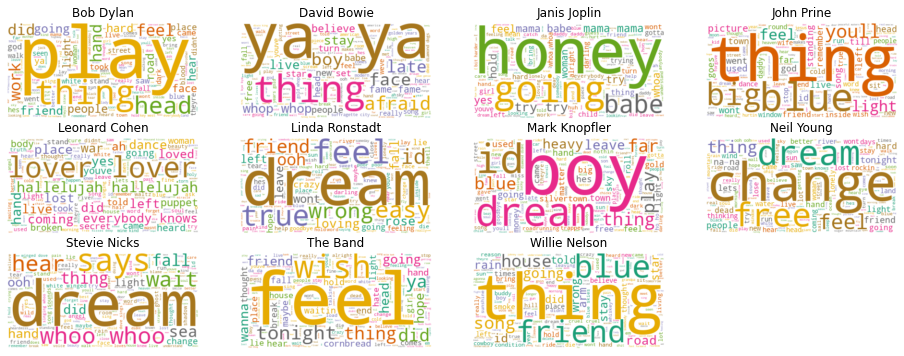

In [52]:
# creating subplots for each musician
for index, musician in enumerate(data.columns):
    wc.generate(data_clean['lyrics'][musician])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

## Number of words 

In [69]:
# Finding whether there are any unique words that each musician uses

# Identify the non-zero items in the document-term matrix, indicating that the word occurs at least once 
unique_list = []
for musician in data.columns:
    uniques = data[musician].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# creating dataframe that contains the unique word count

data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['artist', 'unique_words'])

# data_words= data_words.sort_values(by='unique_words')
data_words

,artist,unique_words
0,Bob Dylan,4482
1,David Bowie,2774
2,Janis Joplin,1333
3,John Prine,2763
4,Leonard Cohen,2799
5,Linda Ronstadt,1801
6,Mark Knopfler,2677
7,Neil Young,2011
8,Stevie Nicks,1796
9,The Band,2700


In [71]:
unique_list

[4482, 2774, 1333, 2763, 2799, 1801, 2677, 2011, 1796, 2700, 1956]

In [75]:
# finding the total number of words that each musician uses 

total_list = []
for musician in data.columns:
    totals = sum(data[musician])
    total_list.append(totals)

    
# making a dataframe with unique words and total words 
data_words['total_words'] = total_list
data_words = data_words.sort_values(by='unique_words')

data_words

,artist,unique_words,total_words
2,Janis Joplin,1333,8495
8,Stevie Nicks,1796,11803
5,Linda Ronstadt,1801,10585
10,Willie Nelson,1956,8079
7,Neil Young,2011,9000
6,Mark Knopfler,2677,7581
9,The Band,2700,11361
3,John Prine,2763,11386
1,David Bowie,2774,10726
4,Leonard Cohen,2799,11322


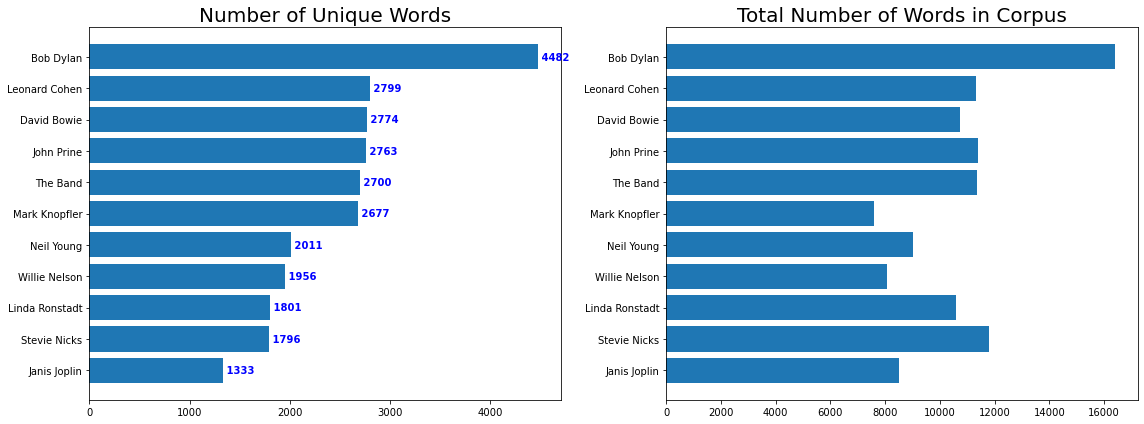

In [78]:
# plotting total words and unique words 

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_words.unique_words, align='center')
plt.yticks(y_pos, data_words['artist'])
plt.title('Number of Unique Words', fontsize=20)

for i, v in enumerate(data_words['unique_words']):
    plt.text(v, i, " "+str(v), color='blue', va='center', fontweight='bold')

    
plt.subplot(1, 2, 2)
plt.barh(y_pos, data_words.total_words, align='center')
plt.yticks(y_pos, data_words['artist'])
plt.title('Total Number of Words in Corpus', fontsize=20)

plt.tight_layout()
plt.show()

In [83]:
# average number of unique words across all artists

np.mean(data_words['unique_words'])

2462.909090909091

### _Findings_

+ Bob Dylan, at 4482 words, has 60% more unique words throughout his music than the artist with the next greatest number of unique words - Leonard Cohen at 2799. 
+ The average number of unique words across all 11 artistis is 2463, and Dylan's count is 82% greater. 

In [88]:
# difference between Dylan's unique word count and next largest count (Leonard Cohen's) 

4482-2799

1683

In [89]:
# percent greater than next largest count (Leonard Cohen)

1683/2799

0.6012861736334405

In [86]:
# difference between Dylan's unique word count and average word count 

4482-2463

2019

In [87]:
# percent greater than average 

2019/2462

0.8200649878147848

In [92]:
Counter(words).most_common()

[('im', 11),
 ('like', 11),
 ('just', 11),
 ('dont', 11),
 ('know', 11),
 ('love', 11),
 ('come', 11),
 ('time', 11),
 ('got', 10),
 ('youre', 9),
 ('oh', 8),
 ('man', 8),
 ('say', 8),
 ('ill', 7),
 ('way', 7),
 ('want', 7),
 ('said', 6),
 ('ive', 6),
 ('long', 6),
 ('night', 6),
 ('good', 6),
 ('day', 5),
 ('tell', 5),
 ('theres', 5),
 ('baby', 5),
 ('away', 5),
 ('life', 5),
 ('make', 4),
 ('mind', 4),
 ('right', 4),
 ('world', 4),
 ('eyes', 4),
 ('need', 4),
 ('little', 4),
 ('heart', 4),
 ('let', 4),
 ('aint', 3),
 ('la', 3),
 ('yeah', 3),
 ('old', 3),
 ('gonna', 3),
 ('thats', 3),
 ('cause', 3),
 ('think', 3),
 ('gone', 3),
 ('lord', 2),
 ('hey', 2),
 ('home', 2),
 ('look', 2),
 ('shes', 2),
 ('play', 1),
 ('head', 1),
 ('ya', 1),
 ('li', 1),
 ('years', 1),
 ('whop', 1),
 ('girl', 1),
 ('afraid', 1),
 ('things', 1),
 ('fame', 1),
 ('tvc', 1),
 ('try', 1),
 ('honey', 1),
 ('mama', 1),
 ('babe', 1),
 ('whoa', 1),
 ('going', 1),
 ('went', 1),
 ('lover', 1),
 ('hallelujah', 1),
 ('kno